# Understanding Descriptive Statistics

Import the necessary libraries here:

In [12]:
# Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [21]:
# your code here

def roll_dice():
    rolls = []
    for i in range(10):
        roll = random.randint(1, 6)
        rolls.append(roll)
    df = pd.DataFrame({'Rolls': rolls})
    return df



#### 2.- Plot the results sorted by value.

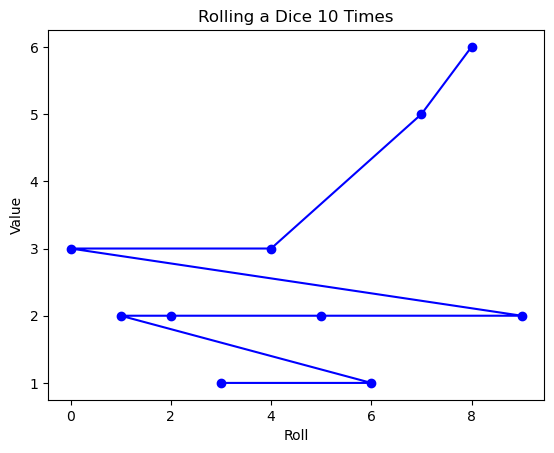

In [14]:
# your code here
df = roll_dice()
df_sorted = df.sort_values(by='Rolls')


plt.plot(df_sorted.index, df_sorted['Rolls'], 'bo-')
plt.xlabel('Roll')
plt.ylabel('Value')
plt.title('Rolling a Dice 10 Times')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

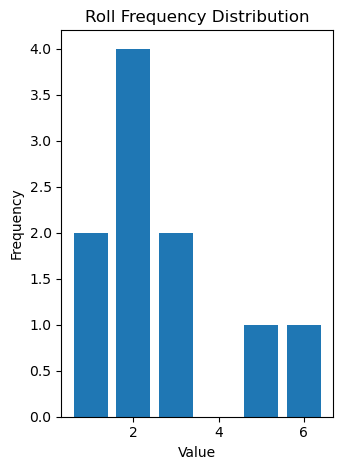

In [15]:
# your code here
df_freq = df['Rolls'].value_counts().sort_index()
plt.subplot(1, 2, 2)
plt.bar(df_freq.index, df_freq.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Roll Frequency Distribution')

plt.tight_layout()
plt.show()


In [ ]:
"""
your comments here

the first plot shows the values of the rolls in the order they were rolled, 
the second plot shows the frequency of each value in the rolls
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
# your code here

def mean(observations):
    total = 0
    for obs in obsservations:
        total += obs
    return total / len(observations)


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
# your code here

rolls = []
for i in range(10):
    roll = random.randint(1, 6)
    rolls.append(roll)
    
freq_dist = {}
for roll in rolls:
    if roll not in freq_dist:
        freq_dist[roll] = 1
    else:
        freq_dist[roll] += 1

total = 0
num_rolls = 0
for value, freq in freq_dist.items():
    total += value * freq
    num_rolls += freq
    
mean = total / num_rolls
print("Mean of the rolls:", mean)



Mean of the rolls: 3.6


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [28]:
# your code here

def calc_median(data):
    
    sorted_data = sorted(data)
    num_observations = len(sorted_data)
    
    if num_observations % 2 == 0:
        middle_index_1 = num_observations // 2 - 1
        middle_index_2 = num_observations // 2
        median = (sorted_data[middle_index_1] + sorted_data[middle_index_2]) / 2
    else:
        middle_index = num_observations // 2
        median = sorted_data[middle_index]
        
    return median


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [31]:
# your code here
def calculate_quartiles(data):
    sorted_data = sorted(data)
    
    num_observations = len(sorted_data)
    if num_observations % 2 == 0:
        middle_index_1 = num_observations // 2 - 1
        middle_index_2 = num_observations // 2
        q2 = (sorted_data[middle_index_1] + sorted_data[middle_index_2]) / 2
    else:
        middle_index = num_observations // 2
        q2 = sorted_data[middle_index]
    
    lower_half = sorted_data[:middle_index_2]
    if len(lower_half) % 2 == 0:
        middle_index_1 = len(lower_half) // 2 - 1
        middle_index_2 = len(lower_half) // 2
        q1 = (lower_half[middle_index_1] + lower_half[middle_index_2]) / 2
    else:
        middle_index = len(lower_half) // 2
        q1 = lower_half[middle_index]
    
    upper_half = sorted_data[middle_index_2:]
    if len(upper_half) % 2 == 0:
        middle_index_1 = len(upper_half) // 2 - 1
        middle_index_2 = len(upper_half) // 2
        q3 = (upper_half[middle_index_1] + upper_half[middle_index_2]) / 2
    else:
        middle_index = len(upper_half) // 2
        q3 = upper_half[middle_index]
    
    return q1, q2, q3


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

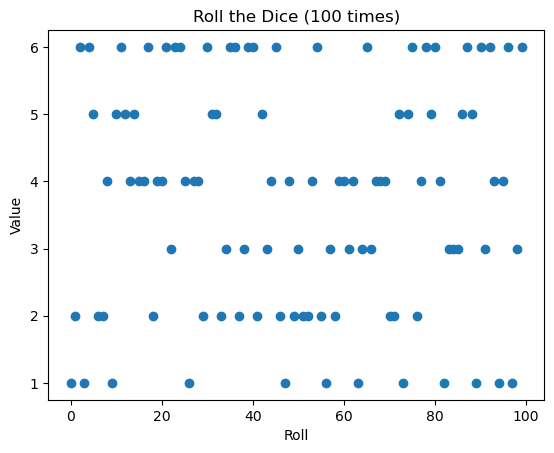

In [40]:
# your code here

data = pd.read_csv('C:\\Users\\farma\Desktop\\iron hack\\week4\\lab\\Descriptive-Stats\\data\\roll_the_dice_hundred.csv')

df_sorted = df.sort_values('value')

plt.plot(df_sorted['roll'], df_sorted['value'], 'o')
plt.xlabel('Roll')
plt.ylabel('Value')
plt.title('Roll ')
plt.show()

In [46]:
"""
The scatter plot shows that each value appears multiple times
"""


'\nThe scatter plot shows that each value appears multiple times\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [52]:

freq_dist = df['value'].value_counts().sort_index()

mean = sum(freq_dist.index * freq_dist.values) / sum(freq_dist.values)

mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [51]:
# your code here
freq_dist = df['value'].value_counts().sort_index()

freq_dist

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

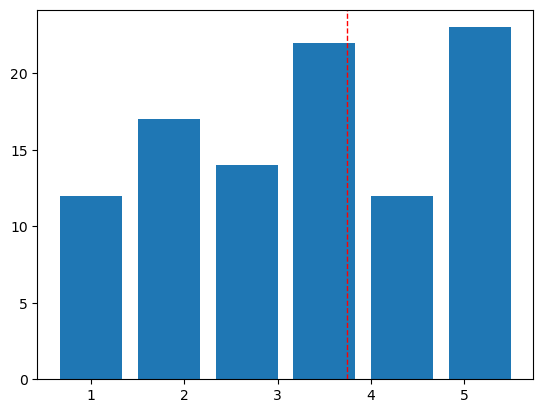

In [53]:
# your code here

plt.hist(df['value'], bins=6, align='left', rwidth=0.8)

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.show()


In [ ]:
"""
The mean value is roughly in the middle of the distribution, which is expected given that the values are evenly distributed between 1 and 6."""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

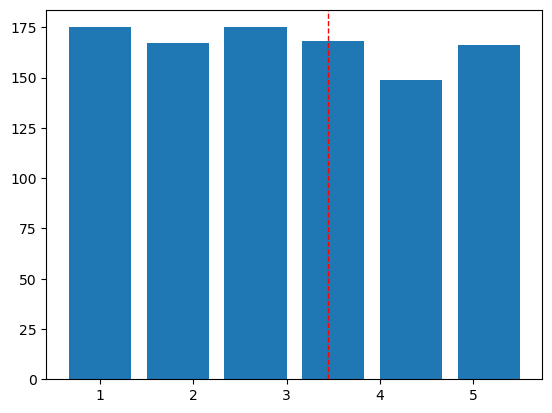

3.447


In [57]:
# your code here
data = pd.read_csv('C:\\Users\\farma\Desktop\\iron hack\\week4\\lab\\Descriptive-Stats\\data\\roll_the_dice_thousand.csv')

mean = data['value'].mean()
plt.hist(data['value'], bins=6, align='left', rwidth=0.8)

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.show()
print(mean)

In [ ]:
"""
the mean tends to be closer to 3.5, this is because with a larger number of rolls, the distribution of the dice values should be more evenly distributed.
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

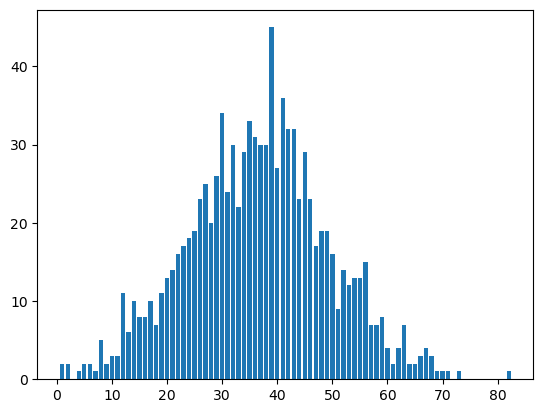

In [60]:
# your code here

data = pd.read_csv('C:\\Users\\farma\Desktop\\iron hack\\week4\\lab\\Descriptive-Stats\\data\\ages_population.csv')

data.head()



freq_dist = data["observation"].value_counts().sort_index()
plt.bar(freq_dist.index, freq_dist.values)
plt.show()

# mean will be somewhere around 36-44 , and the std dev around 10-15

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [61]:
# your code here
# Calculate the mean
mean = data["observation"].mean()

# Calculate the standard deviation
std_dev = data["observation"].std()

print("Mean:", mean)
print("Standard deviation:", std_dev)

Mean: 36.56
Standard deviation: 12.816499625976762


In [ ]:
"""
your comments here yes, more a less
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

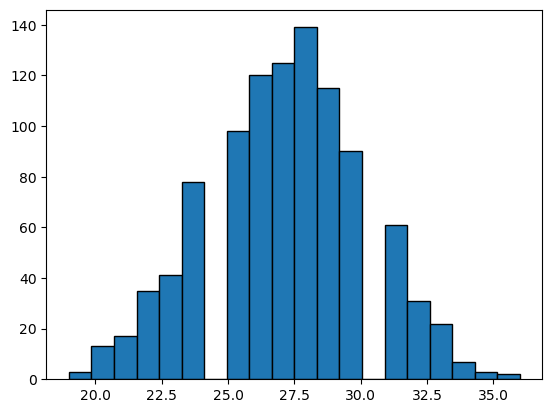

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: observation, dtype: int64


In [67]:
# your code here
data = pd.read_csv('C:\\Users\\farma\Desktop\\iron hack\\week4\\lab\\Descriptive-Stats\\data\\ages_population2.csv')
freq = data["observation"].value_counts()
plt.hist(data["observation"], bins=20, edgecolor="black")

plt.show()
print(freq)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The difference with the frequency distribution in step 1 is that it shows a wider range of ages and a more gradual decrease 
in frequency as age increases,indicating a more diverse population in terms of age."""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [68]:
# your code here
freq = data['observation'].value_counts().sort_index()
mean = np.sum(freq.index * freq.values) / np.sum(freq.values)
std = np.sqrt(np.sum((freq.index - mean)**2 * freq.values) / np.sum(freq.values))
print(mean)
print(std)



27.155
2.968328654310368


In [ ]:
"""
 the data in the second population is more concentrated around the mean, and there is less variability in the data compared to the first population
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

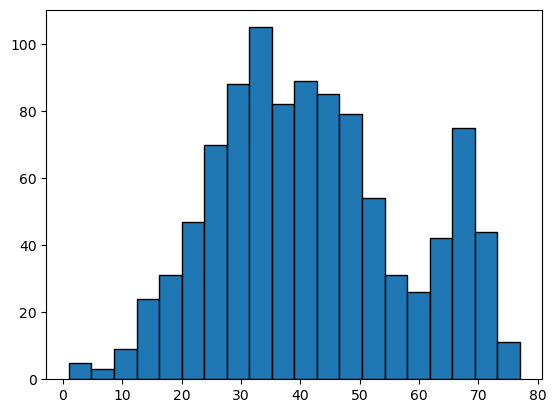

1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: observation, Length: 75, dtype: int64


In [72]:
# your code here
data = pd.read_csv('C:\\Users\\farma\Desktop\\iron hack\\week4\\lab\\Descriptive-Stats\\data\\ages_population3.csv')
freq = data['observation'].value_counts().sort_index()
plt.hist(data["observation"], bins=20, edgecolor="black")

plt.show()
print(freq)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [73]:
# your code here
mean = np.sum(freq.index * freq.values) / np.sum(freq.values)
std = np.sqrt(np.sum((freq.index - mean)**2 * freq.values) / np.sum(freq.values))
print(mean)
print(std)

41.989
16.136631587788077


In [ ]:
"""
Compared to the first distribution, the third distribution has a higher mean and standard deviation
indicating that the data is more spread out and has a greater range. """

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""